# **Rodrigo_Mesquita_DR3_TP2**
## **Inteligência Artificial: Classificação [24E2_3]**

# 1.Carregue o dataset "Titanic" (a mesma do TP1) para um dataframe utilizando linguagem Python e execute as seguintes transformações, utilizando a biblioteca Pandas:


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, RocCurveDisplay
from sklearn import metrics
from sklearn.svm import SVC
import numpy as np
from matplotlib.patches import Rectangle


In [114]:
df = pd.read_csv('/workspaces/Faculdade/Datasets/DR3_TP2_Titanic.csv')

### 1a.Elimine as variáveis “PassengerId”,”Name”,”Ticket” e “Cabin”;

In [115]:
df= df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

### 1b.Elimine observações que contenham dados ausentes (NA);


In [116]:
lines = df.shape[0]
print(lines)
nulls = df.isnull().sum()
print(nulls)

891
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [117]:
df = df.dropna()

In [118]:
lines = df.shape[0]
print(lines)
nulls = df.isnull().sum()
print(nulls)

712
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


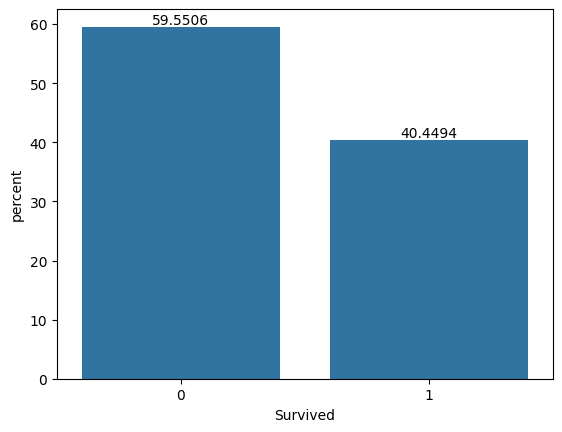

In [119]:
ax = sns.countplot(df, x='Survived', stat="percent")
ax.bar_label(ax.containers[0], fontsize=10);

### 1c.Aplique o LabelEncoder nas variáveis “Embarked” e “Sex”;


In [120]:
encoder = LabelEncoder()
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df['Sex'] = encoder.fit_transform(df['Sex'])

### 1d.Separe o dataframe resultante em Treino-Teste, utilizando a proporção 70-30%.


In [121]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [122]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 20)

### 1e.A partir do dataframe totalmente transformado, aplique um modelo SVM utilizando um Kernel linear.


In [123]:
#Treinando o modelo
model = SVC(kernel='linear')
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

# 2.Apresente as métricas acurácia, precision, recall e F1-score deste modelo.

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       129
           1       0.73      0.66      0.69        85

    accuracy                           0.77       214
   macro avg       0.76      0.75      0.75       214
weighted avg       0.76      0.77      0.76       214



### 2a.Apresente também a matriz de confusão resultante do processo de treinamento.

### Ajustei a forma de exibição da Matriz de Confusão para facilitar a minha compreensão. Parte deste código criei a partir de exemplos da internet e facilitou muito minha compreensão, então irei compartilhar com os demais alunos da classe.

In [137]:
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_cm(cm, titulo, legendas=["Sobreviveu (1)", "Morreu (0)"]):
    """
    Plota a matriz de confusão com legendas TN, FP, FN, TP.

    Parâmetros:
    cm (array-like): Matriz de confusão.
    legendas (list): Lista de rótulos personalizados para as classes.
    titulo (str): Título do gráfico.
    """

    # Inverter a posição das classes 0 e 1 na matriz de confusão
    cm = cm[::-1, ::-1]
    tp, fn, fp, tn = cm.ravel()

    # Plotar a matriz de confusão 
    fig, ax = plt.subplots()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=legendas)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)

    for text in disp.text_.ravel():
        text.set_visible(False)

    # Adicionar retângulos ilustrativos
    rect_v = Rectangle((-0.3, -0.29), 0.6, 1.5, linewidth=2, edgecolor='red', facecolor='none')
    rect_h = Rectangle((-0.32, -0.27), 1.72, 0.5, linewidth=2, edgecolor='blue', facecolor='none')
    ax.add_patch(rect_h)
    ax.add_patch(rect_v)

    # Mover rótulos das classes preditas para o topo
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    # Ajustar títulos dos eixos
    ax.set_title(titulo)
    ax.set_xlabel('Classe Predita')
    ax.set_ylabel('Classe Real')

    # Calcular Métricas
    total = tp + tn + fn + fp
    accuracy = (tp + tn) / total
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0

    accuracy_percent = accuracy * 100   
    precision_percent = precision * 100
    recall_percent = recall * 100

    # Adicionar legendas
    ax.text(0, -0.2, f'TP= {tp}', va='center', ha='center', color='black', fontsize=9, fontweight='bold')
    ax.text(0, -0.1, f'Acurácia:{accuracy_percent:.0f}%', va='center', ha='center', color='black', fontsize=9)
    ax.text(0, 0.0, f'Precisão:{precision_percent:.0f}%', va='center', ha='center', color='red', fontsize=9)
    ax.text(0, 0.1, f'Recall:{recall_percent:.0f}%', va='center', ha='center', color='blue', fontsize=9)

    ax.text(0, 1, f'FP= {fp} \n (Previ errado)', va='center', ha='center', color='black', fontsize=9, fontweight='bold')
    ax.text(1, 0, f'FN= {fn} \n (Deixei de prever)', va='center', ha='center', color='black', fontsize=9, fontweight='bold')
    ax.text(1, 1, f'TN= {tn}', va='center', ha='center', color='black', fontsize=9, fontweight='bold')

    # Adicionar anotações abaixo do gráfico
    accuracy_text = f"Acurácia = (TP + TN) / TOTAL = ({tp}+{tn}) / {total} = {accuracy_percent:.2f}%"
    precision_text = f"Precisão = TP / (TP + FP) = {tp} / ({tp}+{fp}) = {precision_percent:.2f}%"
    recall_text = f"Recall = TP / (TP + FN) = {tp} / ({tp}+{fn}) = {recall_percent:.2f}%"

    plt.figtext(0.22, -0, accuracy_text, wrap=True, horizontalalignment='left', fontsize=9, color='black')
    plt.figtext(0.22, -0.05, precision_text, wrap=True, horizontalalignment='left', fontsize=9, color='red')
    plt.figtext(0.22, -0.1, recall_text, wrap=True, horizontalalignment='left', fontsize=9, color='blue')

    plt.show()

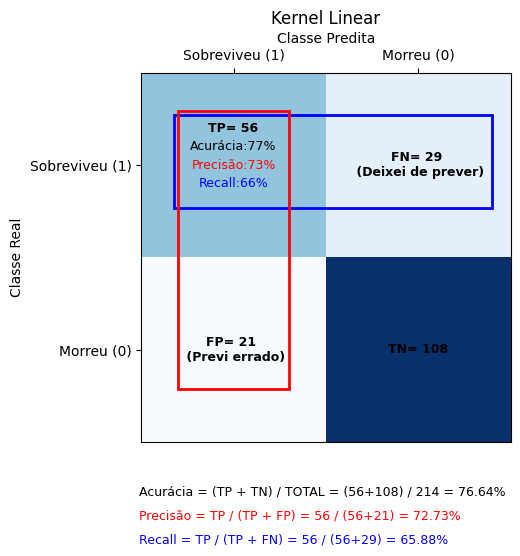

In [138]:
cm_lin = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm_lin, titulo = 'Kernel Linear')

# 3.Execute o mesmo modelo, agora utilizando dois núcleos diferentes, o rbf e o sigmoid.

In [127]:
#Treinando o modelo com kernel rbf
model_rbf = SVC(kernel='rbf',)
model_rbf.fit(x_train, y_train)
y_pred_rbf = pd.DataFrame(model_rbf.predict(x_test))

In [128]:
#Treinando o modelo com kernel sigmoid
model_sig = SVC(kernel='sigmoid')
model_sig.fit(x_train, y_train)
y_pred_sig = pd.DataFrame(model_sig.predict(x_test))

### 3a.Apresente as métricas acurácia, precision, recall e F1-score destes modelos.


In [129]:
print('Métricas do modelo com Kernel rbf')
print(classification_report(y_test, y_pred_rbf))
print('\n \n')
print('Métricas do modelo com Kernel sigmoide')
print(classification_report(y_test, y_pred_sig))

Métricas do modelo com Kernel rbf
              precision    recall  f1-score   support

           0       0.69      0.94      0.79       129
           1       0.79      0.35      0.49        85

    accuracy                           0.71       214
   macro avg       0.74      0.65      0.64       214
weighted avg       0.73      0.71      0.67       214


 

Métricas do modelo com Kernel sigmoide
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       129
           1       0.76      0.40      0.52        85

    accuracy                           0.71       214
   macro avg       0.73      0.66      0.66       214
weighted avg       0.72      0.71      0.69       214



### 3b.Apresente também a matriz de confusão resultante do processo de treinamento.


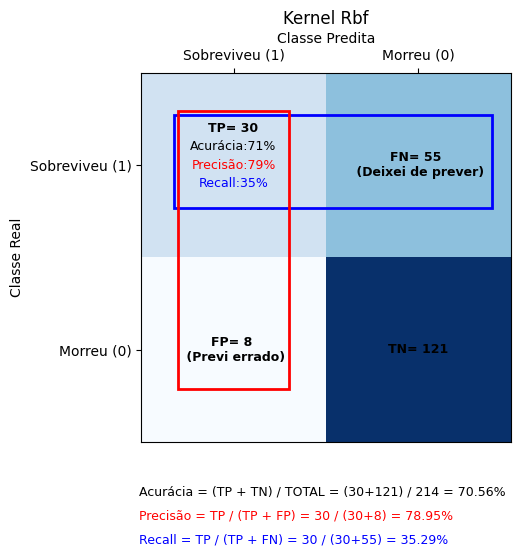

In [139]:
# Matriz kernel rbf
cm_rbf = metrics.confusion_matrix(y_test, y_pred_rbf)
plot_cm(cm_rbf, titulo = 'Kernel Rbf')

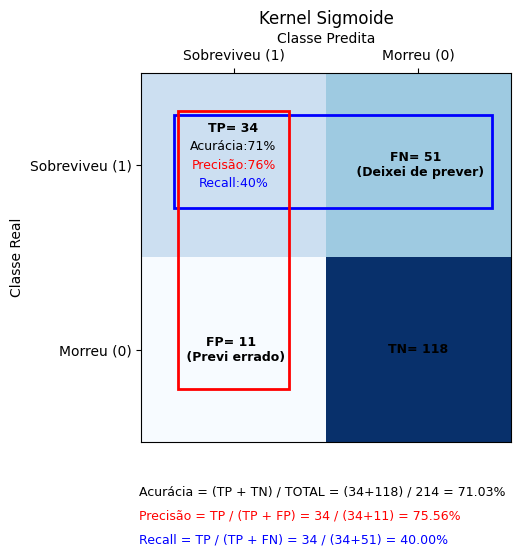

In [140]:
# Matriz kernel sigmoide
cm_sig = metrics.confusion_matrix(y_test, y_pred_sig)
plot_cm(cm_sig, titulo = 'Kernel Sigmoide')

# 4.Compare as três execuções, apresente um resumo dos resultados relevantes e indique qual o melhor, a partir do experimento.